In [2]:
file_id = "1O1dEOM8q7kFaeiRmUs8PsmxAugbINh2-"

!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From: https://drive.google.com/uc?id=1O1dEOM8q7kFaeiRmUs8PsmxAugbINh2-
To: /content/agaricus-lepiota.data
100% 374k/374k [00:00<00:00, 72.2MB/s]


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("/content/agaricus-lepiota.data")
data

,r,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Label Encoding

In [5]:
for feature in data.columns:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])

data

,r,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [6]:
x = data.drop(['r'],axis='columns')
y = data['r']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc = dtc.fit(x_train,y_train)

In [8]:
prediction = dtc.predict(x_test)

scores = cross_val_score(dtc, x_train, y_train, cv=10)
print("mean acc: ", scores.mean())

mean acc:  1.0


In [9]:
dtc.predict_proba(x_test)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [10]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       839
           1       1.00      1.00      1.00       786

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



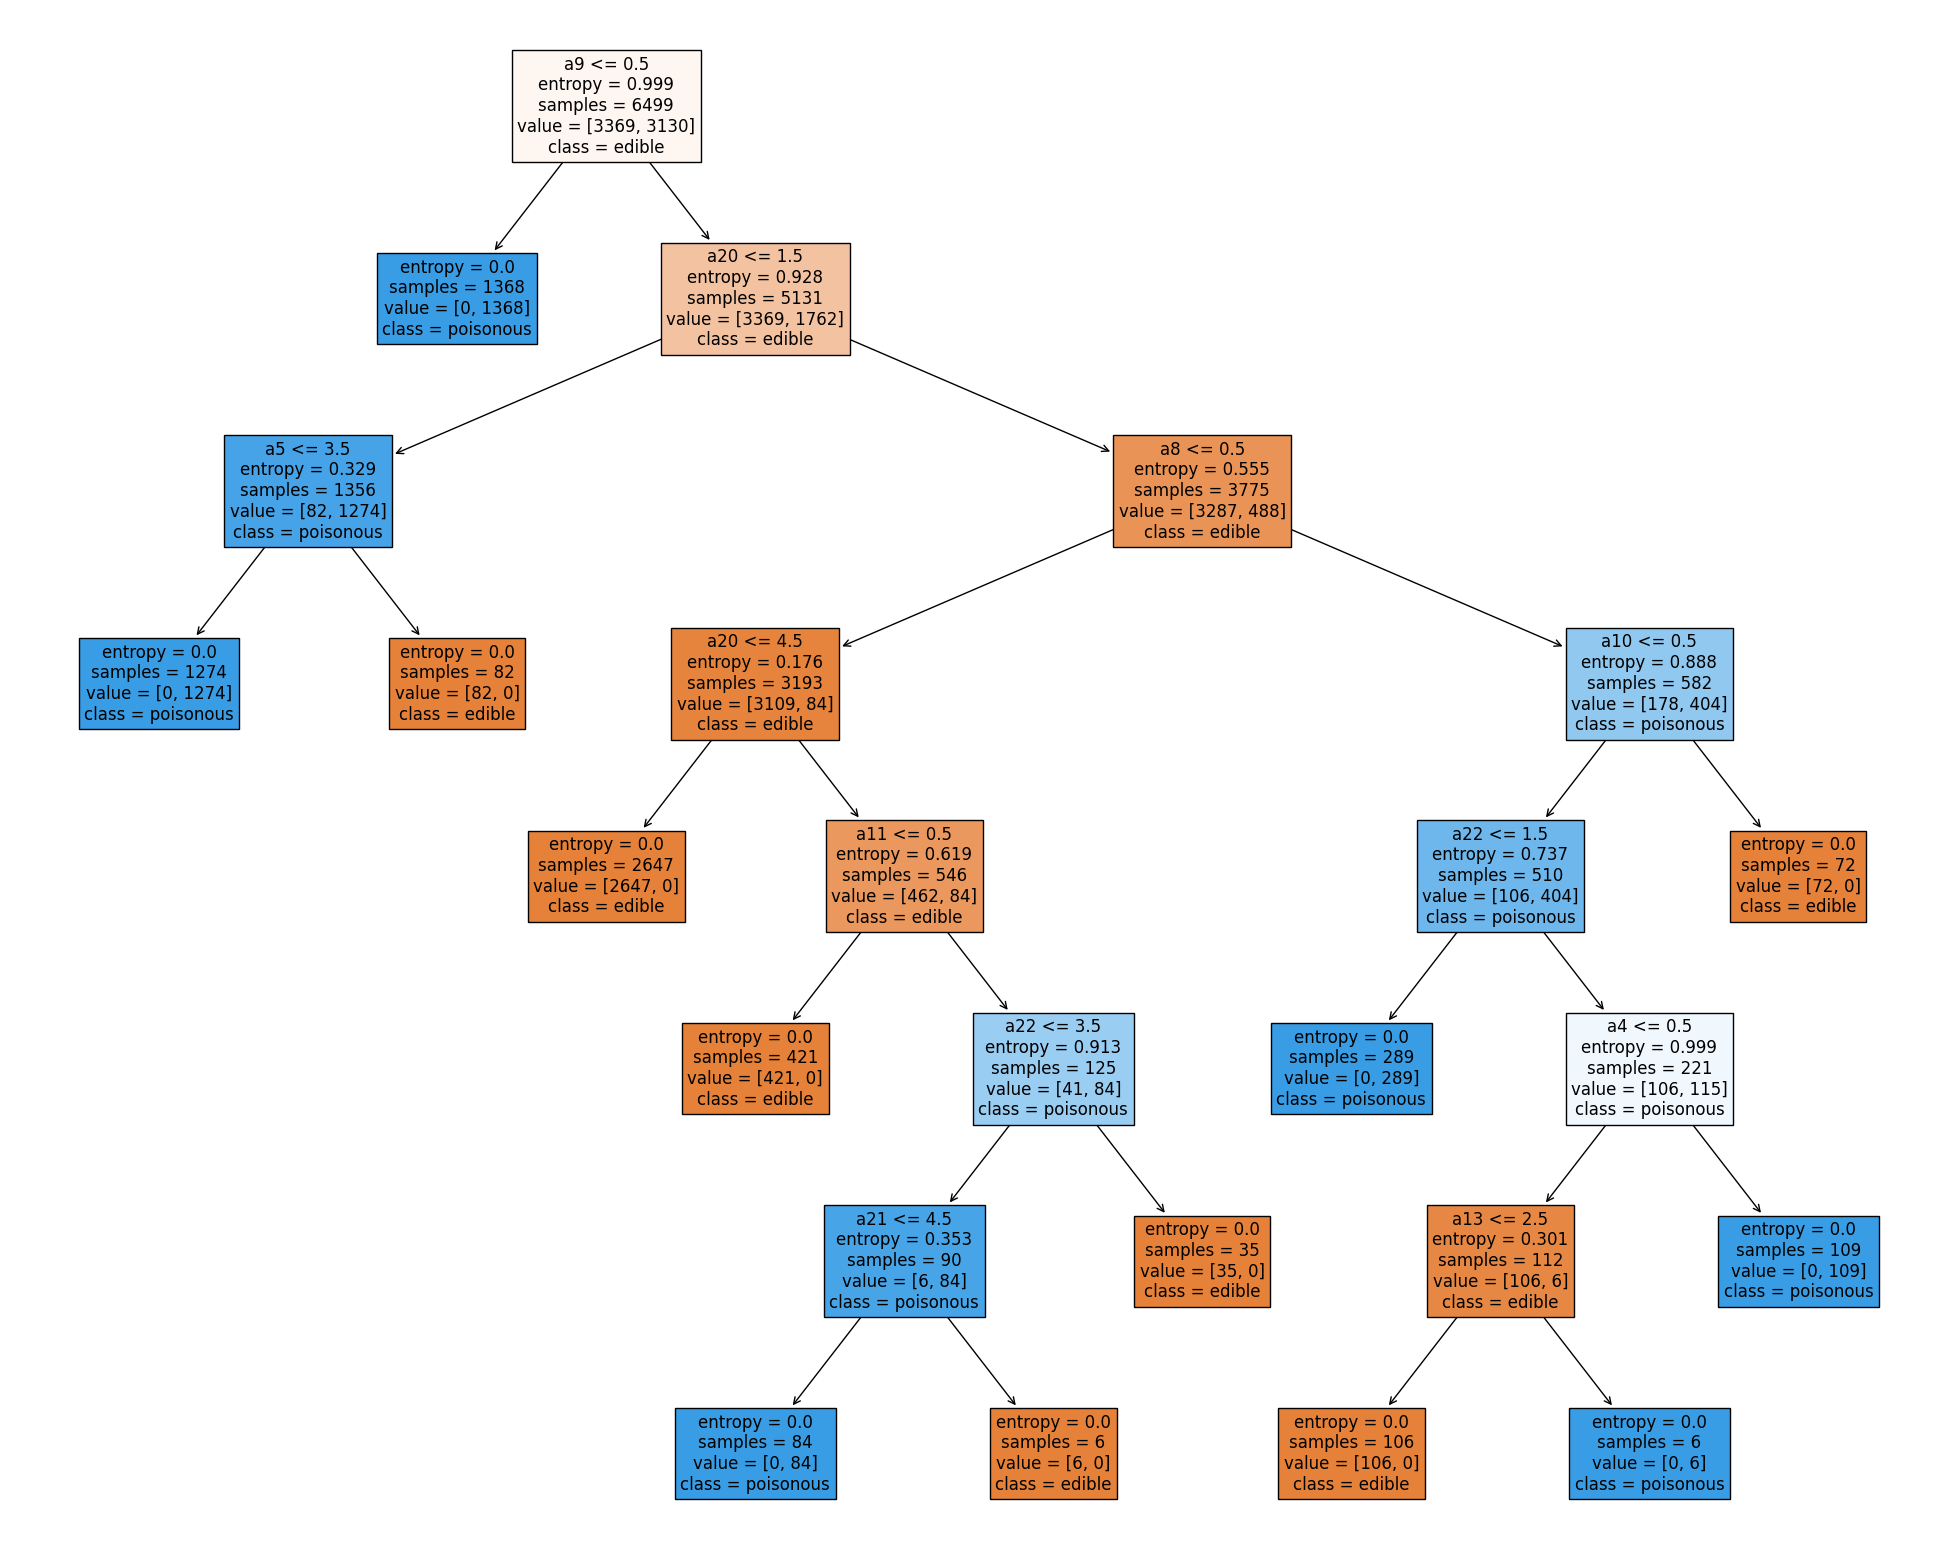

In [11]:
feature_names = x.columns

fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dtc, feature_names=feature_names, class_names={1:'poisonous',0:'edible'},filled=True, fontsize=12)

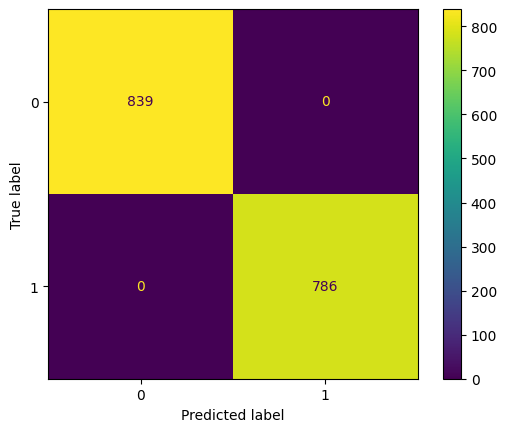

In [12]:
cm = confusion_matrix(y_test,prediction)
cm = ConfusionMatrixDisplay(cm)

cm.plot()
plt.show()

# One Hot Encoding

In [13]:
dataset = pd.read_csv("/content/agaricus-lepiota.data")

data_encoded=pd.get_dummies(data=dataset,drop_first=True)
data_encoded

,r_p,a1_c,a1_f,a1_k,a1_s,a1_x,a2_g,a2_s,a2_y,a3_c,...,a21_n,a21_s,a21_v,a21_y,a22_g,a22_l,a22_m,a22_p,a22_u,a22_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
x = data_encoded.drop(['r_p'],axis='columns')
y = data_encoded['r_p']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [15]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc = dtc.fit(x_train,y_train)

In [16]:
prediction = dtc.predict(x_test)

scores = cross_val_score(dtc, x_train, y_train, cv=10)
print("mean acc: ", scores.mean())

mean acc:  0.9997542997542996


In [17]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2079
           1       1.00      1.00      1.00      1983

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



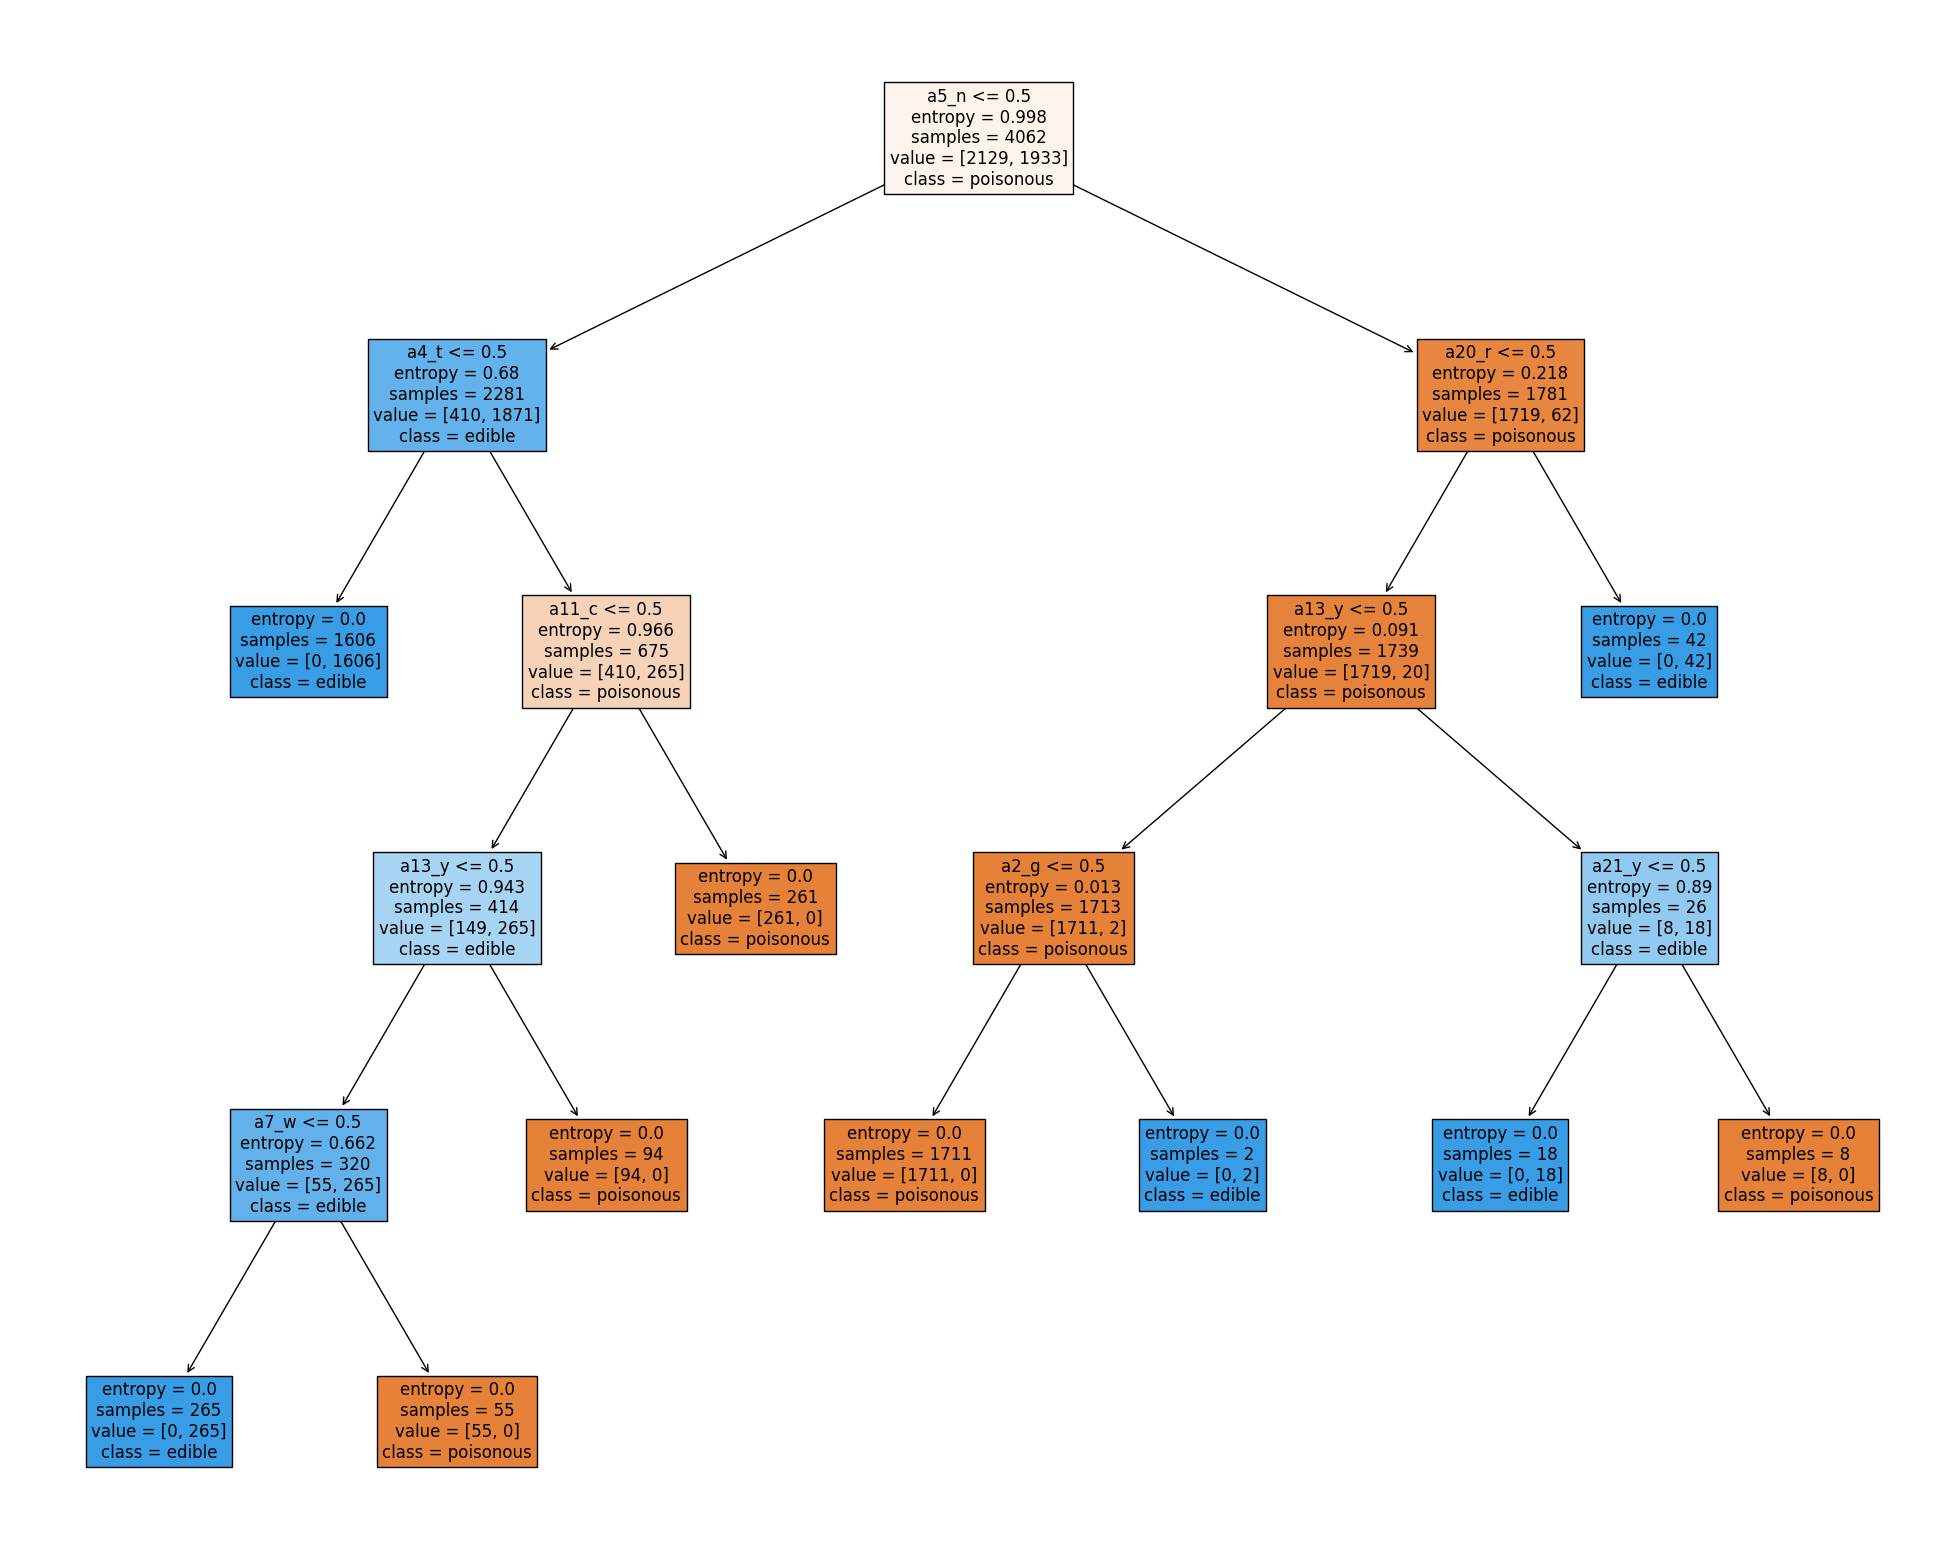

In [18]:
feature_names = x.columns

fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dtc, feature_names=feature_names, class_names={1:'edible',0:'poisonous'},filled=True, fontsize=12)

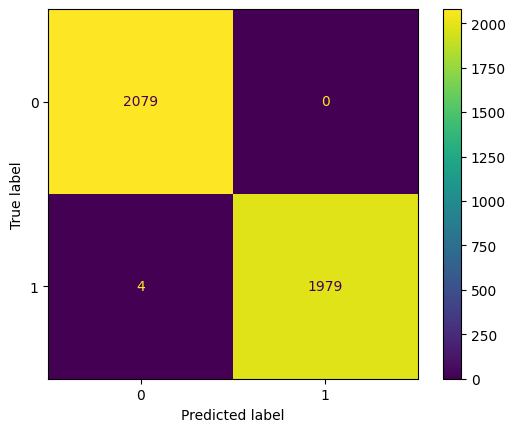

In [19]:
cm = confusion_matrix(y_test,prediction)
cm = ConfusionMatrixDisplay(cm)

cm.plot()
plt.show()

# Algoritmo ID3

In [20]:
import numpy as np
import math
from statistics import mode

In [21]:
class Atribute:
    name: str
    values: list

    def __init__(self,name,values=['Empty']):
        self.name = name
        self.values = values

    def get_values(self):
        return self.values

    @property
    def representation(self):
        return self.name

class Vertex:
    data: any
    next: dict = dict()

    def __init__(self,data):
        self.data = data
    
    def add_next(self, value: str, v):
        self.next[value] = v
    
    def get_next(self, value: str):
        return self.next[value]

    def get_data(self):
        return self.data

    @property
    def representation(self):
        return self.get_data().representation

class Graph:
    root: Vertex
    c_label: str
    c_values: list = list()
    features: list = list()
    vertices: list = list()
    edges: dict = dict()
    vertex_counter: int = 0

    def __init__(self, dataset, class_label):
        self.c_label = class_label
        self.c_values = dataset[class_label].unique()

        for feature in dataset.drop(class_label,axis='columns').columns:
            self.features.append(Atribute(name=feature,values=dataset[feature].unique()))
    
    def remove_feature(self, feature: Atribute):
        self.features.remove(feature)
    
    def add_vertex(self, a: Vertex):
        self.vertex_counter += 1
        self.vertices.append(a)

    def add_edge(self, a: Vertex, b: Vertex, weight):
        self.edges[tuple([a,b])] = weight

    def set_root(self, a: Vertex):
        self.root = a

    def get_features(self):
        return self.features

    def get_class_values(self):
        return self.c_values

    def get_vertices(self):
        return self.vertices

    def get_edges(self):
        return self.edges

    def get_len(self):
        return self.vertex_counter
      
    def get_root(self):
        return self.root

    @property
    def class_label(self):
        return self.c_label

    @property
    def remaining_features(self):
        return len(self.features)

class Classifier:
    true_positives: int = 0
    true_negatives: int = 0
    false_positives: int = 0
    false_negatives: int = 0

    def classify_examples(self, dataset: pd.DataFrame, tree: Graph):
        self.true_positives = 0
        self.true_negatives = 0
        self.false_positives = 0
        self.false_negatives = 0

        classes = list()
        class_values = tree.get_class_values()
        class_label = tree.class_label
        root = tree.get_root()

        for index in dataset.index:
            current_node = root
            example = dataset.loc[index]
            classification = ""

            while classification == "":
                atribute = current_node.representation
                example_value = example[atribute]
                next = current_node.get_next(example_value)

                if next.representation in class_values:
                    classification = next.representation
                else:
                    current_node = next

            self.classify_inference(classification, example[class_label], class_values)
            classes.append(classification)
          
        return classes

    def split_dataset(self, dataset, proportion):
        #train_start = math.floor(len(dataset.index)*proportion)
        #train_data = dataset[train_start:]
        #test_data = dataset[:train_start]
        train_data, test_data, _, _ = train_test_split(dataset,dataset,test_size=proportion)
        return train_data, test_data

    def get_confusion_matrix(self):
        return np.array([[self.true_positives, self.false_negatives],[self.false_positives, self.true_negatives]])

    def classify_inference(self, classification, true_class, class_values):
        if classification == true_class and classification == class_values[0]:
            self.true_positives += 1
            return
        if classification == true_class and classification == class_values[1]:
            self.true_negatives += 1
            return
        if classification != true_class and classification == class_values[0]:
            self.false_positives += 1
            return
        if classification != true_class and classification == class_values[1]:
            self.false_negatives += 1
            return




In [22]:
def information_gain(s, atribute):
    values = s[atribute].unique()
    sum = 0
    for value in values:
        sv = s[s[atribute]==value]
        pv = len(sv) / len(s)
        ev = entropy(sv)
        sum = sum + pv*ev
    return entropy(s) - sum

def entropy(s: set):
    if len(s) == 0:
        return 0
    p1 = len(s[s.r=='e']) / len(s)
    p0 = 1 - p1
    if p0==0 or p1==0:
        return 0
    else:
        return -p0*np.log2(p0) - p1*np.log2(p1)

def generate_tree(gp: Graph, samples, prev=None, val='', prev_mode=''):
    # Dataframe está vazio
    if samples[gp.class_label].empty:
        node = Vertex(data=Atribute(name=prev_mode))
        prev.add_next(val,node)
        gp.add_vertex(node)
        gp.add_edge(prev, node, val)

        return gp

    # Só existe um rótulo ou não existem mais atributos disponíveis
    if samples[gp.class_label].nunique() == 1 or gp.remaining_features == 0:
        if samples[gp.class_label].unique()[0] == 'p' or mode(samples[gp.class_label]) == 'p':
            node = Vertex(data=Atribute(name='p'))
        else:
            node = Vertex(data=Atribute(name='e'))
        
        prev.add_next(val,node)
        gp.add_vertex(node)
        gp.add_edge(prev, node, val)     

        return gp
        
    most_relevant = ['', -1]
    for att in gp.get_features():
        gain = information_gain(samples, att.representation)
        if gain > most_relevant[1]:
            most_relevant = [att, gain]

    atribute, _ = most_relevant

    node = Vertex(data=atribute)
    gp.add_vertex(node)
    
    gp.remove_feature(atribute)

    if prev != None:
        prev.add_next(val,node)
        gp.add_edge(prev, node, val)
    else:
        gp.set_root(node)

    for value in node.get_data().get_values():
        s = samples[samples[atribute.representation] == value]
        gp = generate_tree(gp, s, node, value, mode(dataset[gp.class_label]))
    
    return gp


def convert_tree_into_dataframe(gp: Graph):
    table_of_edges = {'Atribute': [], 'Value': [], 'Next Atribute': [], 'Classification': []}
    
    for edge, weight in gp.get_edges().items():
        a, b = list(edge)
        a = a.get_data()
        b = b.get_data()

        table_of_edges['Atribute'].append(a.representation)

        if b.get_values()[0] == 'Empty':
            table_of_edges['Next Atribute'].append('-')
            table_of_edges['Classification'].append(b.representation)
        else:
            table_of_edges['Next Atribute'].append(b.representation)
            table_of_edges['Classification'].append('-')
    
        table_of_edges['Value'].append(weight)

    connections = pd.DataFrame(data=table_of_edges)

    return connections

In [23]:
dataset = pd.read_csv("/content/agaricus-lepiota.data")
dataset

,r,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [24]:
class_label = 'r'

dtc = Classifier()
train_data, test_data = dtc.split_dataset(dataset, 0.3)

decision_tree = Graph(train_data, class_label)
decision_tree = generate_tree(decision_tree, train_data)

In [25]:
connections = convert_tree_into_dataframe(decision_tree)
connections

,Atribute,Value,Next Atribute,Classification
0,a5,n,a20,-
1,a20,n,-,e
2,a20,w,a22,-
3,a22,d,a8,-
4,a8,b,-,e
5,a8,n,-,p
6,a22,u,-,e
7,a22,g,-,e
8,a22,l,a3,-
9,a3,g,-,e


In [26]:
result = dtc.classify_examples(test_data,decision_tree)

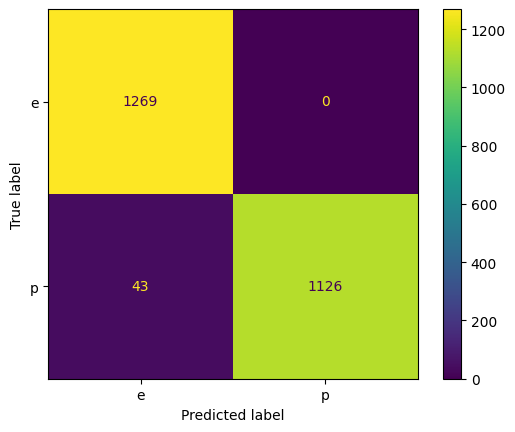

In [27]:
labels = decision_tree.get_class_values()
cm = dtc.get_confusion_matrix()
cm = ConfusionMatrixDisplay(cm,display_labels=labels)

cm.plot()
plt.show()